<img src="https://upload.wikimedia.org/wikipedia/commons/d/df/Logo_UNIR.png" width="350" height="175">

# *TFM: Comparación y optimización de algoritmos de Machine Learning sobre el éxito de campañas de marketing bancarias*

Autor: ***Jorge López Pérez***

***

## ***11. Resultados finales***

A lo largo de este cuaderno, veremos los resultados finales obtenidos sobre train, cv y test en todas las métricas

In [ ]:
!pip install scikit-learn==1.4.2

In [ ]:
!pip install scikeras

In [ ]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
import warnings
import time
import matplotlib.pyplot as plt
import seaborn as sns

#modelos
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from tensorflow import keras
from sklearn.ensemble import RandomForestClassifier
import xgboost
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from scikeras.wrappers import KerasClassifier

#metricas
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix

#encoders
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

#imputers
from sklearn.impute import KNNImputer

#escalers
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings("ignore")

Leemos los datos ya transformados:

In [ ]:
x_train_prepared = pd.read_csv('https://raw.githubusercontent.com/JorgeLopez88/TFM/main/data/transformed_data/x_train_prepared.csv').to_numpy()
x_test_prepared = pd.read_csv('https://raw.githubusercontent.com/JorgeLopez88/TFM/main/data/transformed_data/x_test_prepared.csv').to_numpy()
y_train_prepared = pd.read_csv('https://raw.githubusercontent.com/JorgeLopez88/TFM/main/data/transformed_data/y_train_prepared.csv').to_numpy()
y_test_prepared = pd.read_csv('https://raw.githubusercontent.com/JorgeLopez88/TFM/main/data/transformed_data/y_test_prepared.csv').to_numpy()

print(x_train_prepared.shape)
print(x_test_prepared.shape)
print(y_train_prepared.shape)
print(y_test_prepared.shape)

(34999, 33)
(6177, 33)
(34999, 1)
(6177, 1)


***

#### 11.1 Definición de modelos

In [ ]:
def build_rn_optimizado():
  inputs = keras.Input(shape=(x_train_prepared.shape[1],))

  hidden1 = keras.layers.Dense(64, activation='tanh', kernel_regularizer=keras.regularizers.L2(0.0001))(inputs)
  hidden1 = keras.layers.Dropout(0.3)(hidden1)

  hidden2 = keras.layers.Dense(32, activation='tanh', kernel_regularizer=keras.regularizers.L2(0.0001))(hidden1)
  hidden2 = keras.layers.Dropout(0.03)(hidden2)

  hidden3 = keras.layers.Dense(16, activation='tanh', kernel_regularizer=keras.regularizers.L2(0.0001))(hidden2)
  hidden3 = keras.layers.Dropout(0.03)(hidden3)

  hidden4 = keras.layers.Dense(8, activation='tanh', kernel_regularizer=keras.regularizers.L2(0.0001))(hidden3)
  outputs = keras.layers.Dense(1, activation='sigmoid')(hidden4)

  model = keras.Model(inputs=inputs, outputs=outputs)
  model.compile(optimizer=keras.optimizers.Adam(learning_rate= 0.001), loss='binary_crossentropy', metrics=[keras.metrics.AUC(curve='PR', name='auc_pr')])
  return model

In [ ]:
best_params_lr = {
    'random_state': 44,
    'penalty': 'l2', 'solver': 'liblinear', 'tol': 0.009981344185968627, 'C': 0.0446691778043737, 'max_iter': 115
}

best_params_dt = {
    'random_state': 44,
    'criterion': 'entropy', 'splitter': 'best', 'max_depth': 11, 'min_samples_split': 17, 'min_samples_leaf': 12, 'max_features': None, 'max_leaf_nodes': 58
}

best_params_knn = {
    'n_neighbors': 50, 'algorithm': 'brute', 'leaf_size': 32, 'p': 2
}

best_params_rf = {
    'random_state': 44,
    'n_estimators': 217, 'criterion': 'log_loss', 'max_depth': 22, 'min_samples_split': 16, 'min_samples_leaf': 2, 'max_features': None, 'max_leaf_nodes': 115
}

best_params_xgb = {
    'random_state': 44,
    'objective': 'binary:logistic', 'n_estimators': 663, 'max_depth': 7, 'learning_rate': 0.008783201476590967, 'subsample': 0.9982562365165706, 'colsample_bytree': 0.6330211837686112, 'colsample_bylevel': 0.5337460744463578, 'min_child_weight': 7, 'gamma': 0.0018843588248896698, 'lambda': 0.013059187310266722
}

best_params_hist = {
    'random_state': 44,
    'learning_rate': 0.014973674237963659, 'max_iter': 326, 'max_leaf_nodes': 27, 'max_depth': 9, 'min_samples_leaf': 17, 'l2_regularization': 8.790025433222111e-06, 'max_bins': 140, 'early_stopping': False
}

best_params_rn = {
    'model': build_rn_optimizado,
    'epochs': 60,
    'batch_size': 64,
    'verbose': 0,
    'random_state': 44,
}

best_params_voting= {
    'voting' : 'soft',
    'weights' : [0.07706639223827505, 0.2543946849801558, 0.12439539774863495, 0.05917170893708934, 0.3646432394020082, 0.8664926603286063, 0.7899967421503448]
}

umbrales_decision = {
    'lr': 0.30956306346334556,
    'dt': 0.45,
    'kn': 0.335,
    'rn': 0.4619227945804596,
    'rf': 0.4409208877853789,
    'xgb': 0.41521722078323364,
    'hist': 0.4376945586668581,
    'voting': 0.4239847736394669
}

In [ ]:
def initialize_models():

  estimators = [
      ('lr', LogisticRegression(**best_params_lr)),
      ('dt', DecisionTreeClassifier(**best_params_dt)),
      ('kn', KNeighborsClassifier(**best_params_knn)),
      ('rn', KerasClassifier(**best_params_rn)),
      ('rf', RandomForestClassifier(**best_params_rf)),
      ('xgb', xgboost.XGBClassifier(**best_params_xgb)),
      ('hist', HistGradientBoostingClassifier(**best_params_hist))
  ]

  dict_estimators = dict(estimators)

  voting = VotingClassifier(estimators=estimators, **best_params_voting)
  dict_estimators['voting'] = voting

  return dict_estimators

***

#### 11.2 Cálculo de métricas

Funciones para cálculo de métricas:

In [ ]:
def probas_to_abs(probas, umbral=0.5):
  abs = []
  for proba in probas:
    if (proba >= umbral): abs.append(1)
    else: abs.append(0)
  return abs

def calculate_cv_metrics(estimator,x,y, umbral_decision):
  skf = StratifiedKFold(n_splits=5, shuffle=True,random_state=44)

  scores_auc_pr = []
  scores_precision = []
  scores_recall = []
  scores_f1 = []
  scores_accuracy = []
  scores_roc = []

  for i, (train_idx, test_idx) in enumerate(skf.split(x, y)):

    X_train, X_test = x[train_idx], x[test_idx]
    Y_train, Y_test = y[train_idx], y[test_idx]

    model = clone(estimator)
    model.fit(X_train, Y_train)
    preds_test = model.predict_proba(X_test)[:,1]

    scores_auc_pr.append(average_precision_score(Y_test, preds_test))
    scores_precision.append(precision_score(Y_test, probas_to_abs(preds_test, umbral_decision)))
    scores_recall.append(recall_score(Y_test, probas_to_abs(preds_test, umbral_decision)))
    scores_f1.append(f1_score(Y_test, probas_to_abs(preds_test, umbral_decision)))
    scores_accuracy.append(accuracy_score(Y_test, probas_to_abs(preds_test, umbral_decision)))
    scores_roc.append(roc_auc_score(Y_test, preds_test))

  mean_auc_pr = round(np.mean(scores_auc_pr), 4)
  mean_precision = round(np.mean(scores_precision), 4)
  mean_recall = round(np.mean(scores_recall), 4)
  mean_f1 = round(np.mean(scores_f1), 4)
  mean_accuracy = round(np.mean(scores_accuracy), 4)
  mean_roc = round(np.mean(scores_roc), 4)

  return mean_auc_pr, mean_precision, mean_recall, mean_f1, mean_accuracy, mean_roc


def calculate_all_metrics_cv_train_test(umbrales_decision):
  modelos = initialize_models()
  for key, model in modelos.items():
      auc_pr, precision, recall, f1, accuracy, roc = calculate_cv_metrics(model, x_train_prepared, y_train_prepared, umbrales_decision[key])
      start_time = time.time()
      model.fit(x_train_prepared, y_train_prepared)
      end_time = time.time()
      elapsed_time = end_time - start_time
      probas_train = model.predict_proba(x_train_prepared)[:,1]
      probas_test = model.predict_proba(x_test_prepared)[:,1]

      print(f'Training time for {key}: ', round(elapsed_time, 4))
      print('-----')

      print(f'CV -> AUC PR score for {key}: ', auc_pr)
      print(f'CV -> Precision score for {key}: ', precision)
      print(f'CV -> Recall score for {key}: ', recall)
      print(f'CV -> F1 score for {key}: ', f1)
      print(f'CV -> Accuracy score for {key}: ', accuracy)
      print(f'CV -> ROC AUC score for {key}: ', roc)
      print('-----')

      print(f'TRAIN -> AUC PR score for {key}: ', round(average_precision_score(y_train_prepared, probas_train), 4))
      print(f'TRAIN -> Precision score for {key}: ', round(precision_score(y_train_prepared, probas_to_abs(probas_train, umbrales_decision[key])), 4))
      print(f'TRAIN -> Recall score for {key}: ', round(recall_score(y_train_prepared, probas_to_abs(probas_train, umbrales_decision[key])), 4))
      print(f'TRAIN -> F1 score for {key}: ', round(f1_score(y_train_prepared, probas_to_abs(probas_train, umbrales_decision[key])), 4))
      print(f'TRAIN -> Accuracy score for {key}: ', round(accuracy_score(y_train_prepared, probas_to_abs(probas_train, umbrales_decision[key])), 4))
      print(f'TRAIN -> ROC AUC score for {key}: ', round(roc_auc_score(y_train_prepared, probas_train), 4))
      print('-----')

      print(f'TEST -> AUC PR score for {key}: ', round(average_precision_score(y_test_prepared, probas_test), 4))
      print(f'TEST -> Precision score for {key}: ', round(precision_score(y_test_prepared, probas_to_abs(probas_test, umbrales_decision[key])), 4))
      print(f'TEST -> Recall score for {key}: ', round(recall_score(y_test_prepared, probas_to_abs(probas_test, umbrales_decision[key])), 4))
      print(f'TEST -> F1 score for {key}: ', round(f1_score(y_test_prepared, probas_to_abs(probas_test, umbrales_decision[key])), 4))
      print(f'TEST -> Accuracy score for {key}: ', round(accuracy_score(y_test_prepared, probas_to_abs(probas_test, umbrales_decision[key])), 4))
      print(f'TEST -> ROC AUC score for {key}: ', round(roc_auc_score(y_test_prepared, probas_test), 4))
      print('-----')

      print('')
      print('**********************************')
      print('')


def print_confusion_matrix(umbrales_decision):
  modelos = initialize_models()
  fig, axes = plt.subplots(2, 4, figsize=(20, 8))

  for idx, (key, model) in enumerate(modelos.items()):
      model.fit(x_train_prepared, y_train_prepared)
      probas_test = model.predict_proba(x_test_prepared)[:, 1]
      preds_test = probas_to_abs(probas_test, umbrales_decision[key])
      conf_matrix = confusion_matrix(y_test_prepared, preds_test)

      ax = axes[idx // 4, idx % 4]
      sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", ax=ax)
      ax.set_xlabel('Etiquetas Predichas')
      ax.set_ylabel('Etiquetas Verdaderas')
      ax.set_title(f'Modelo: {key}')

  plt.tight_layout()
  plt.show()

***

#### 11.3 Resultados finales: train, cv y test


In [ ]:
calculate_all_metrics_cv_train_test(umbrales_decision)

Training time for lr:  0.3102
-----
CV -> AUC PR score for lr:  0.5888
CV -> Precision score for lr:  0.5929
CV -> Recall score for lr:  0.5927
CV -> F1 score for lr:  0.5927
CV -> Accuracy score for lr:  0.9082
CV -> ROC AUC score for lr:  0.9258
-----
TRAIN -> AUC PR score for lr:  0.5892
TRAIN -> Precision score for lr:  0.5956
TRAIN -> Recall score for lr:  0.5957
TRAIN -> F1 score for lr:  0.5957
TRAIN -> Accuracy score for lr:  0.9089
TRAIN -> ROC AUC score for lr:  0.9266
-----
TEST -> AUC PR score for lr:  0.5845
TEST -> Precision score for lr:  0.6103
TEST -> Recall score for lr:  0.6121
TEST -> F1 score for lr:  0.6112
TEST -> Accuracy score for lr:  0.9123
TEST -> ROC AUC score for lr:  0.9297
-----

**********************************

Training time for dt:  0.2342
-----
CV -> AUC PR score for dt:  0.6329
CV -> Precision score for dt:  0.618
CV -> Recall score for dt:  0.6021
CV -> F1 score for dt:  0.6073
CV -> Accuracy score for dt:  0.9126
CV -> ROC AUC score for dt:  0.9

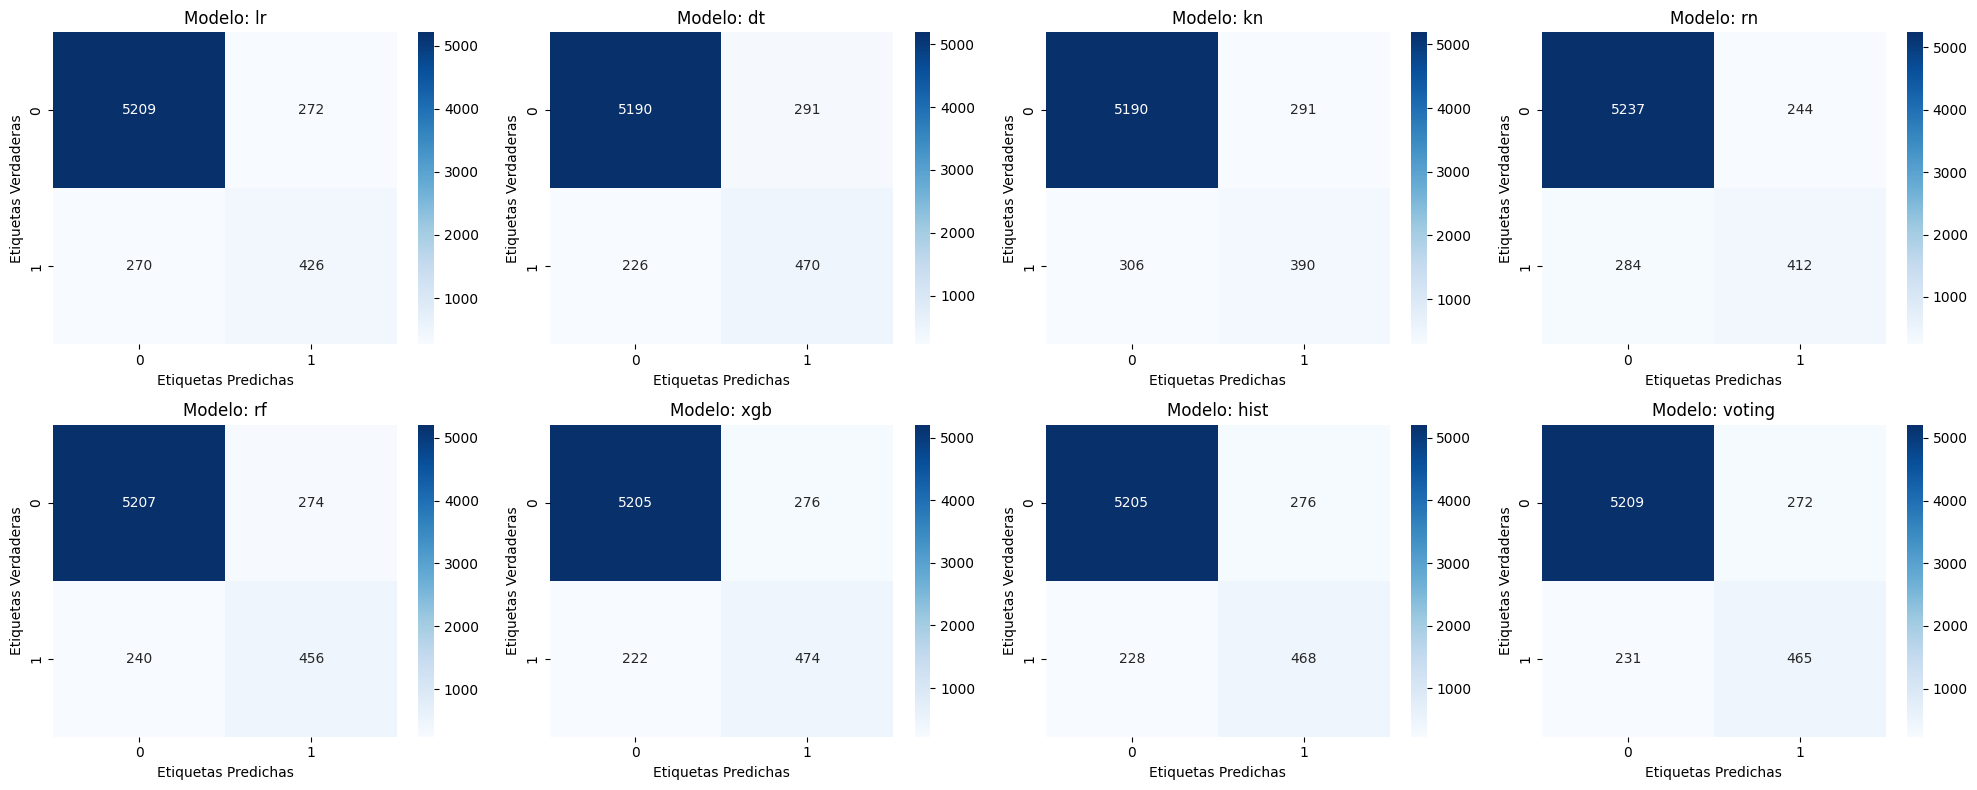

In [ ]:
print_confusion_matrix(umbrales_decision)

***